# Import Data

In [67]:
# import modules
import pandas as pd

In [68]:
# import raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
3259,"SGalCer 36:2;4 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,13.8536,...,0.0,0.0,0.0000,7.8246,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4018,GM2 34:2;2 (LCB 18:0;2-H2O),0.0,29.0208,0.0,0.0,0.0,0.0,56.3898,48.0554,10.2534,...,0.0,0.0,40.4145,31.5347,48.8882,58.0648,49.9076,39.2544,9.1514,27.5575
1408,NAPE 46:7+NH4 (-FA 20:1 (NH4)),1585.0,1480.0000,1768.0,1453.0,825.0,658.0,649.0000,624.0000,1509.0000,...,477.0,543.0,1113.0000,0.0000,1091.0000,1166.0000,2448.0000,2910.0000,2482.0000,2331.0000


In [69]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
3135,HexCer 32:2;3 (LCB 18:0;2-2H2O),HexCer,32,2
3136,HexCer 32:2;3 (LCB 18:0;2-H2O),HexCer,32,2
929,NAPE 32:3+NH4 (-NAPE (20:4 NH4)),NAPE,32,3


In [70]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.head()

,Exp,Mutation
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


In [71]:
# import head group metadata
df_hg = pd.read_csv('dataframes/pos_df_hg.csv')
df_hg.head(3)

,Head Group,Head Group 2
0,Hex2Cer,Hex_Cer
1,GT3,GT
2,GT2,GT


In [72]:
# merge df_hg and df_meta
df_meta2 = df_meta.merge(df_hg, on=['Head Group'])
df_meta2.head(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer


In [73]:
# rename columns by protein
df_p = df.rename(columns=df_exps.set_index('Exp')['Mutation'])
df_p = df_p.drop(columns=['RAJU'])
df_p = df_p.set_index('Sample Name')
df_p.columns.names=['Mutation']
df_p.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


# Normalize Data

In [74]:
# define functions to normalize down column
def norm_col(df):
    return df/df.sum()

In [75]:
def norm_row(df):
    return df.div(df.sum(axis=1), axis=0)

In [76]:
# move sample name column into index
df_norm = df_p
df_norm.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


In [77]:
# normalize down the columns
df_norm_col = df_norm/df_norm.sum()
df_norm_col.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000041,0.000035,0.000027,0.00003,0.000052,0.000056,0.000041,0.000041,0.000076,0.00005,...,0.000045,0.000044,0.000022,0.000015,0.000029,0.000029,0.000053,0.000062,0.000052,0.000046


In [78]:
# normalize across row
df_norm_row = df_norm.div(df_norm.sum(axis=1), axis=0)
df_norm_row.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.024047,0.020591,0.017999,0.019007,0.024711,0.026337,0.017279,0.017279,0.040513,0.026545,...,0.018719,0.020447,0.009799,0.006692,0.012672,0.013104,0.03305,0.040049,0.029663,0.026207


In [79]:
# normalize across both row & col
df_norm = df_norm_col.div(df_norm_col.sum(axis=1), axis=0)
df_norm.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020109,0.017009,0.013354,0.01481,0.025356,0.027332,0.020265,0.020058,0.037429,0.0246,...,0.021906,0.021732,0.010703,0.007327,0.014411,0.014257,0.026237,0.030193,0.025487,0.022504


# Average/groupby protein

In [80]:
# normalized by row & col
df_norm_avg = df_norm.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_avg = df_norm_avg.groupby('Mutation').mean().T
df_norm_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.016321,0.023252,0.028633,0.031835,0.029677,0.032569,0.029765,0.020168,0.011674,0.026105
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.065121,0.032380,0.012078,0.013554,0.012055,0.020480,0.029845,0.001851,0.047381,0.015253
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.012328,0.032438,0.021996,0.025539,0.030487,0.028882,0.024480,0.029179,0.022799,0.021873
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.017954,0.042018,0.021450,0.029334,0.024417,0.030182,0.015766,0.022369,0.025732,0.020779
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.029993,0.024854,0.019933,0.020654,0.023985,0.020611,0.018442,0.032176,0.036749,0.022602


In [81]:
# normalized by row only
df_norm_row_avg = df_norm_row.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_row_avg = df_norm_row_avg.groupby('Mutation').mean().T
df_norm_row_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020411,0.021402,0.031956,0.028405,0.027034,0.033241,0.027860,0.016882,0.010567,0.032242
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.078368,0.028599,0.013087,0.011465,0.010702,0.019837,0.027584,0.001504,0.041317,0.017536
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.015926,0.030322,0.025096,0.023253,0.028544,0.030185,0.023401,0.024605,0.021097,0.027571
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.022769,0.038518,0.024130,0.026532,0.022645,0.031431,0.015468,0.018809,0.023712,0.025986
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.037998,0.022715,0.022420,0.018439,0.021945,0.021170,0.017250,0.026798,0.033455,0.027809


In [82]:
# normalized by row only
df_norm_col_avg = df_norm_col.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_col_avg = df_norm_col_avg.groupby('Mutation').mean().T
df_norm_col_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000033,0.000047,0.000058,0.000065,0.000061,0.000066,0.000061,4.111432e-05,0.000024,0.000053
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000013,0.000007,0.000002,0.000003,0.000002,0.000004,0.000006,3.813730e-07,0.000010,0.000003
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000038,0.000099,0.000067,0.000078,0.000093,0.000088,0.000075,8.894810e-05,0.000069,0.000067
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.000011,0.000025,0.000013,0.000018,0.000015,0.000018,0.000009,1.345920e-05,0.000015,0.000013
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.000090,0.000075,0.000060,0.000062,0.000072,0.000062,0.000055,9.660495e-05,0.000110,0.000068


# Correlation Matrix, whole dataset

In [83]:
import seaborn as sns

In [84]:
df_corr = df_norm_avg.corr()

<AxesSubplot:xlabel='Mutation', ylabel='Mutation'>

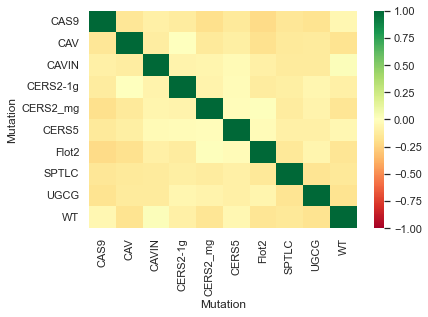

In [85]:
sns.heatmap(df_corr, vmin=-1.0,vmax=1.0, cmap='RdYlGn')

# Clustermap, whole dataset

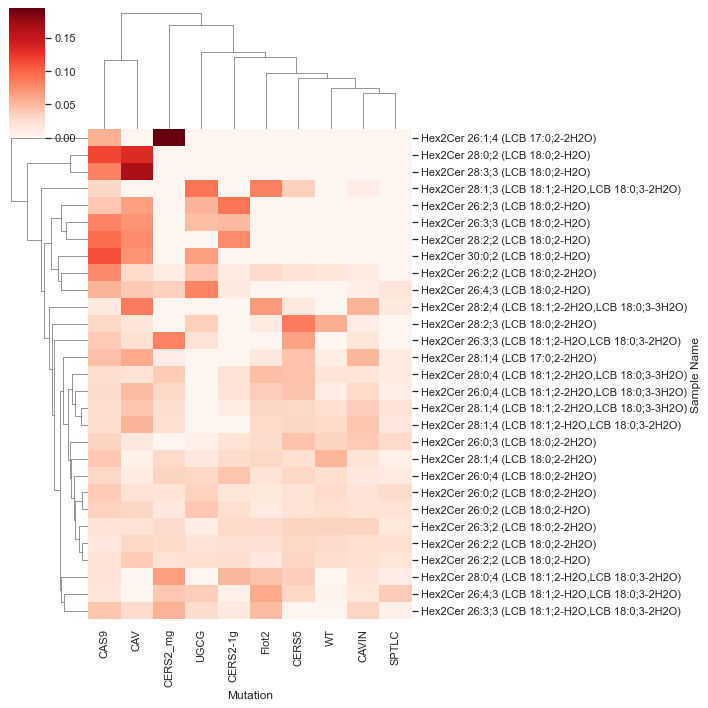

In [86]:
sns.clustermap(df_norm_row_avg.iloc[:29], cmap='Reds')

# Correlation matrix

In [87]:
'''
Returns the correlation matrix for a dataset when comparing by specific proteins.
Data is normalized by column and row. 

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: variable of interest (row) to be dropped (ex: head group PE)
drop_protein: mutation (column) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def corr_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).set_title(title)

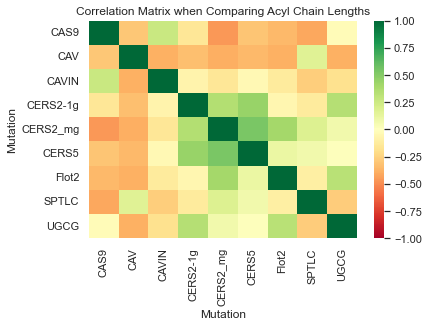

In [88]:
corr_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

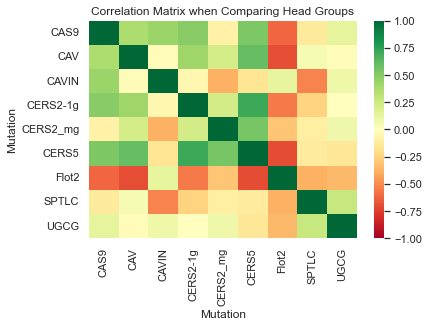

In [89]:
corr_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

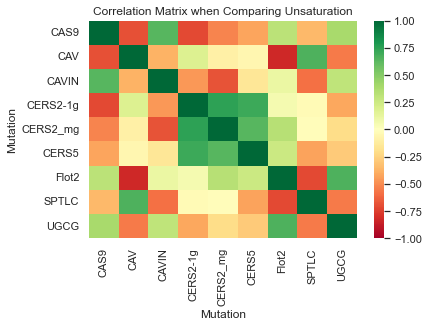

In [90]:
corr_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )

# Clustermap of correlation matrix

In [91]:
'''
Returns the correlation matrix sorted by similarity (clustered) for a dataset when comparing by specific proteins
Data is normalized by column and row

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: list variable of interests (rows) to be dropped (ex: head group PE)
drop_protein: list of mutations (columns) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def cluster_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).fig.suptitle(title, y=1.05)

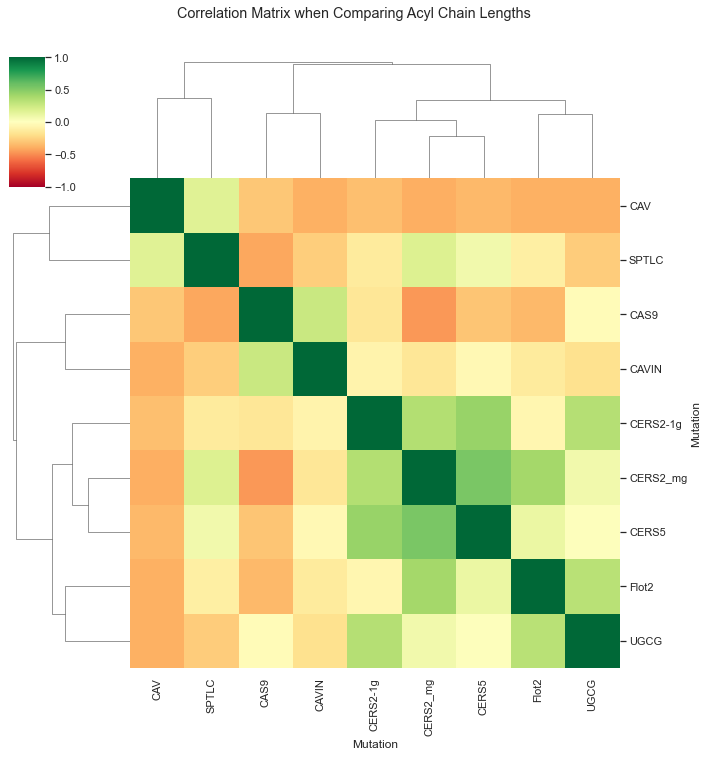

In [92]:
cluster_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

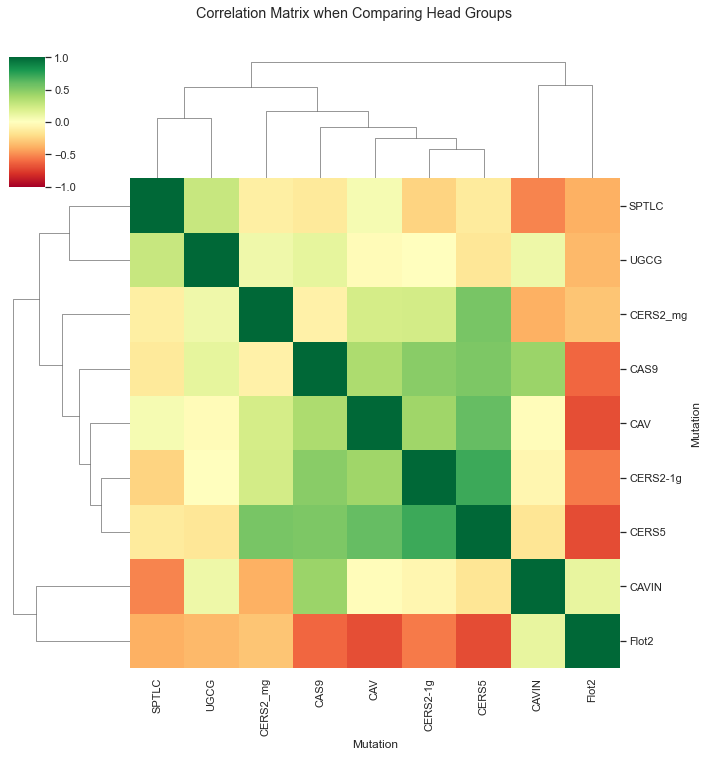

In [93]:
cluster_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

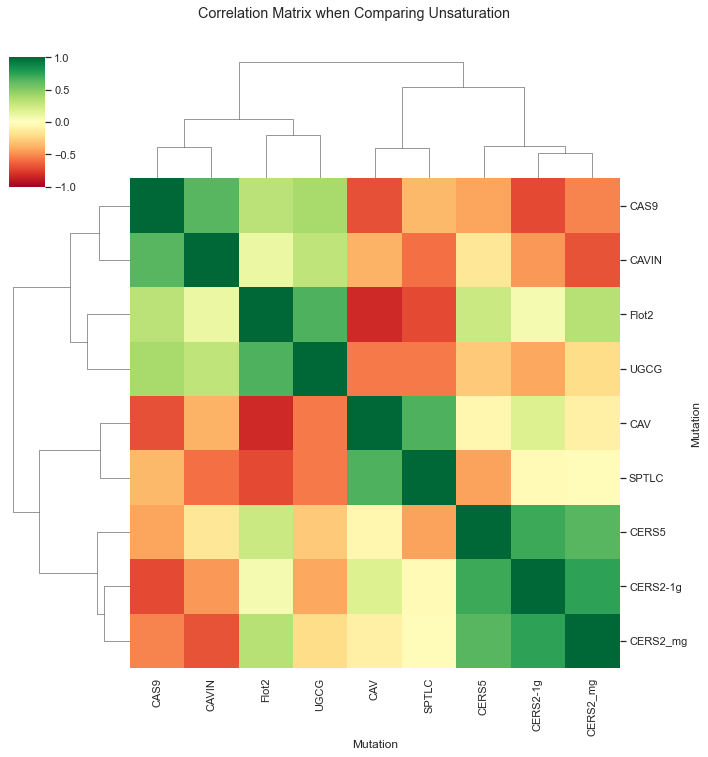

In [94]:
cluster_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )

# Heatmaps

In [95]:
'''
Returns heatmap, with values normalized down the column
'''
def heatmap_norm_col(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the mutation
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

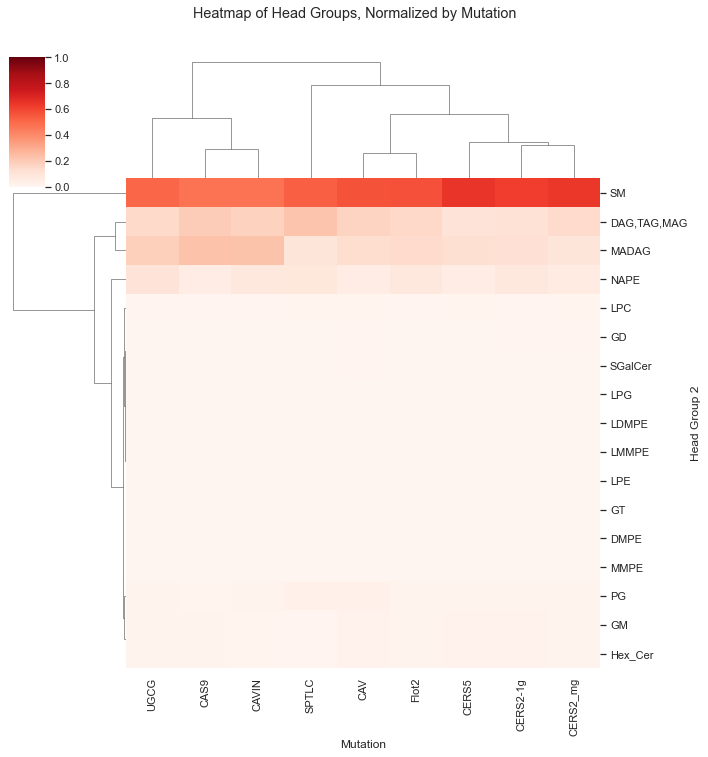

In [96]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Head Group 2',
        drop_var=['PE', 'PC'],
        drop_protein=['WT'],
        title='Heatmap of Head Groups, Normalized by Mutation'
       )

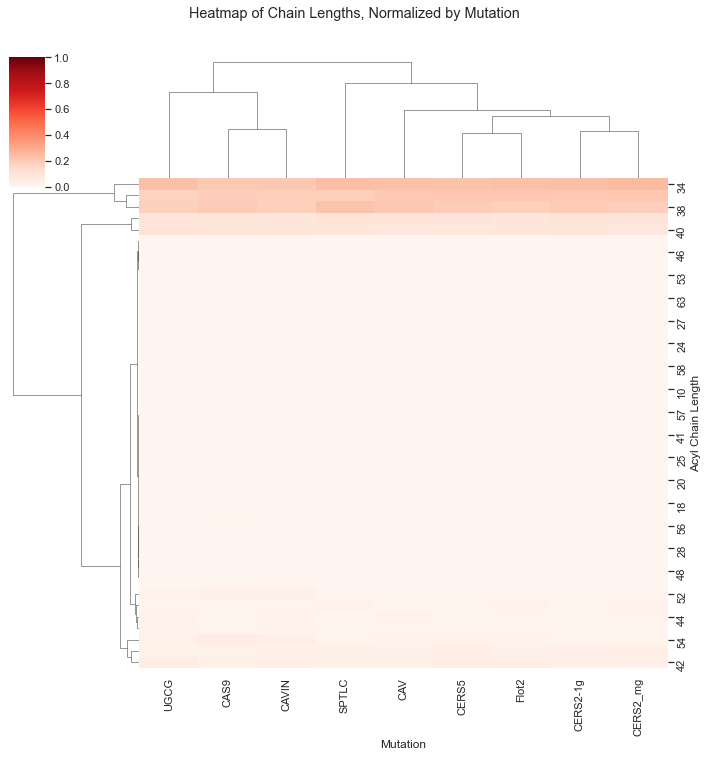

In [97]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Mutation'
       )

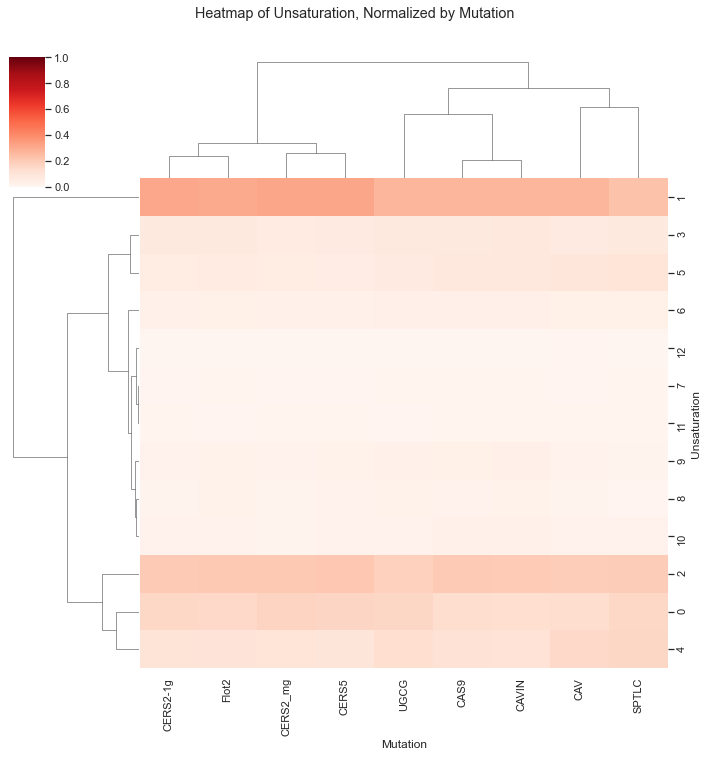

In [98]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Unsaturation',
        drop_protein=['WT'],
        title='Heatmap of Unsaturation, Normalized by Mutation'
       )

In [99]:
'''
Returns heatmap with values normalized by row
'''
def heatmap_norm_row(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    df = norm_row(df)
    # print(df.sum(axis=1))
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

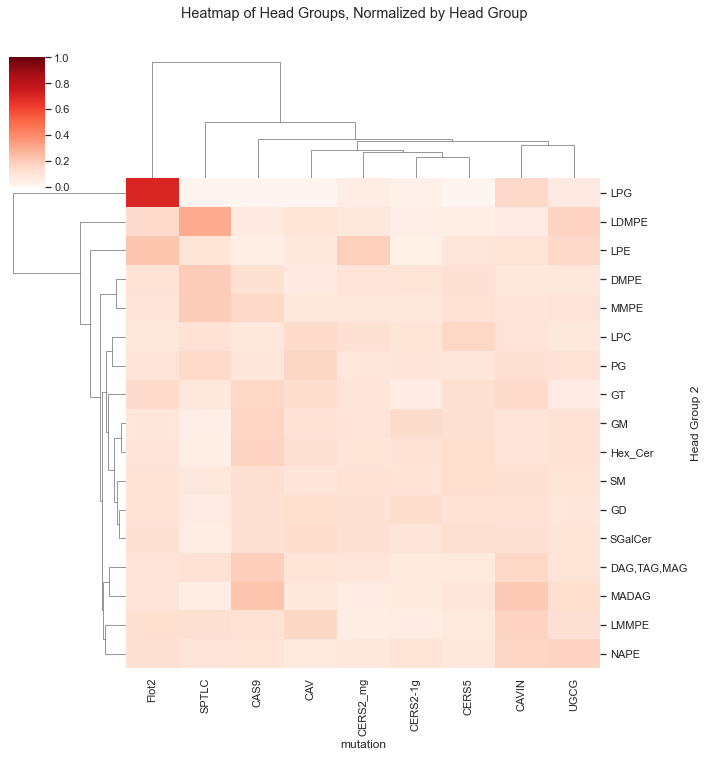

In [100]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Head Group 2',
                 drop_var=['PE', 'PC'],
                 drop_protein=['WT'],
                 title='Heatmap of Head Groups, Normalized by Head Group'
                )

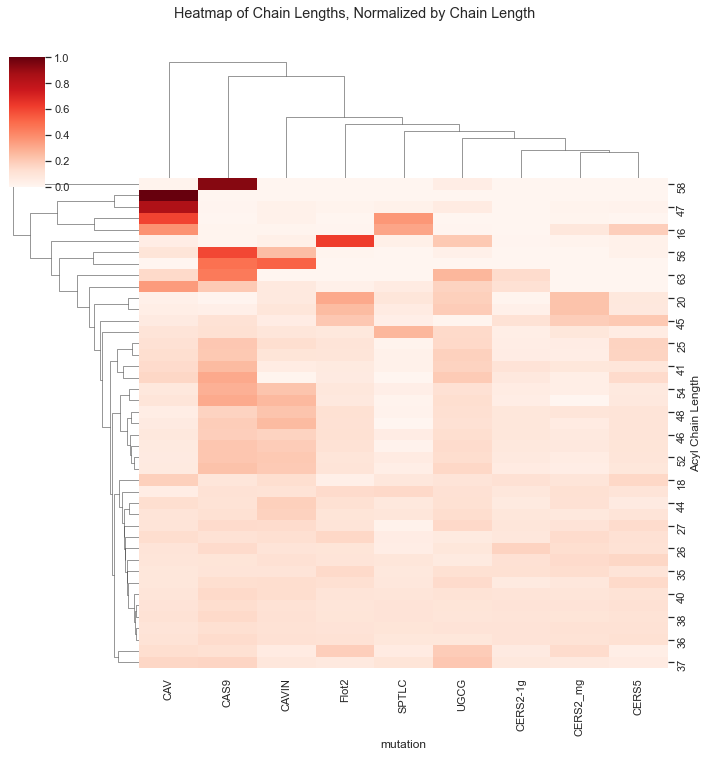

In [101]:
heatmap_norm_row(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Chain Length'
       )

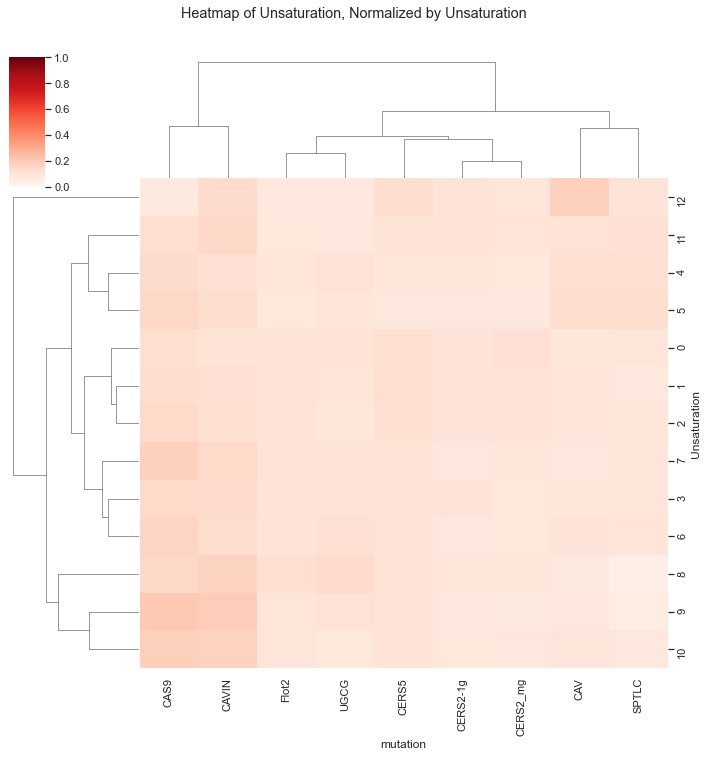

In [102]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Unsaturation',
                 drop_protein=['WT'],
                 title='Heatmap of Unsaturation, Normalized by Unsaturation',
                )

In [103]:
'''
Returns heatmap, with values normalized by both column and row
'''
def heatmap_norm(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the mutation
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    # normalize by the variable (row)
    df = norm_row(df)
    # print(df.sum(axis=1))
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

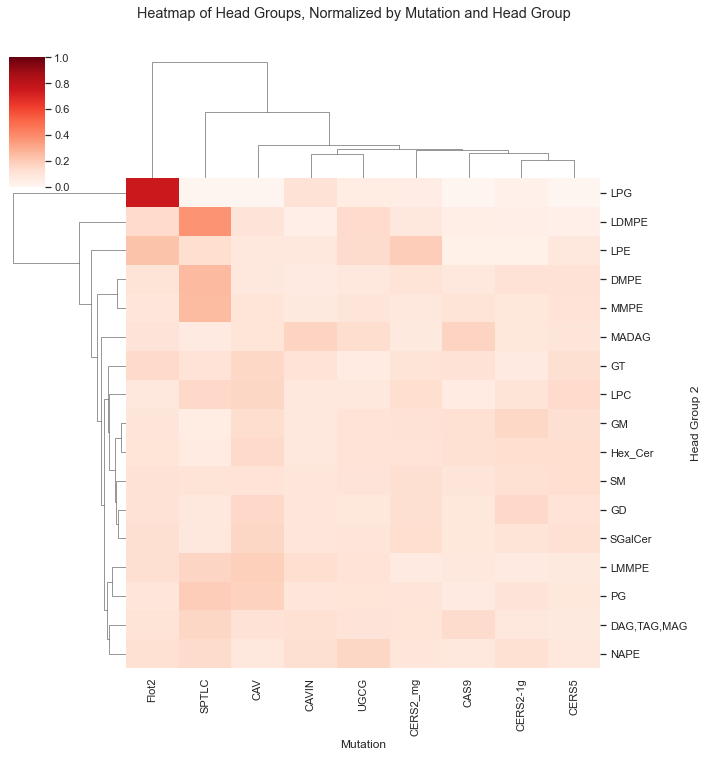

In [104]:
heatmap_norm(df_meta2,
        df_p,
        col='Head Group 2',
        drop_var=['PE', 'PC'],
        drop_protein=['WT'],
        title='Heatmap of Head Groups, Normalized by Mutation and Head Group'
       )

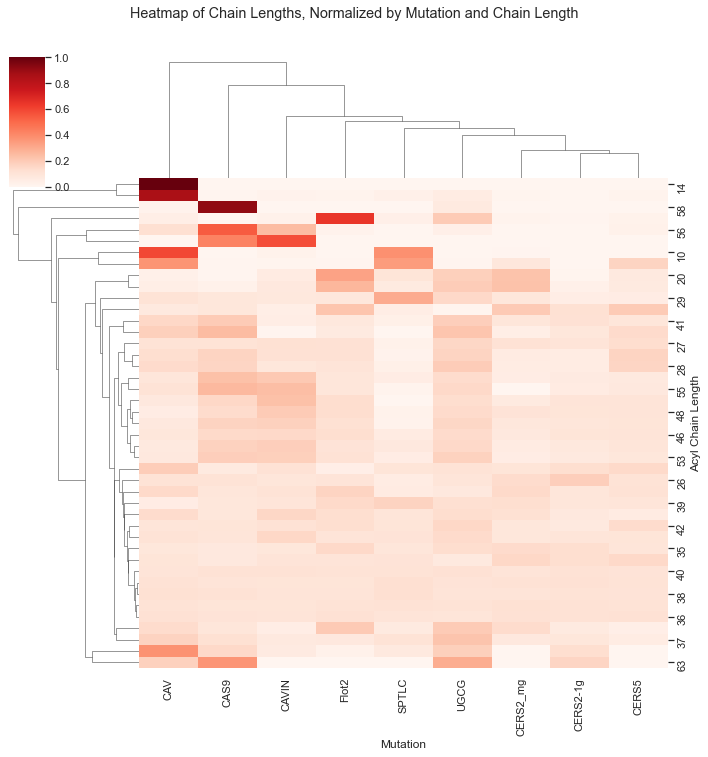

In [105]:
heatmap_norm(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Mutation and Chain Length'
       )

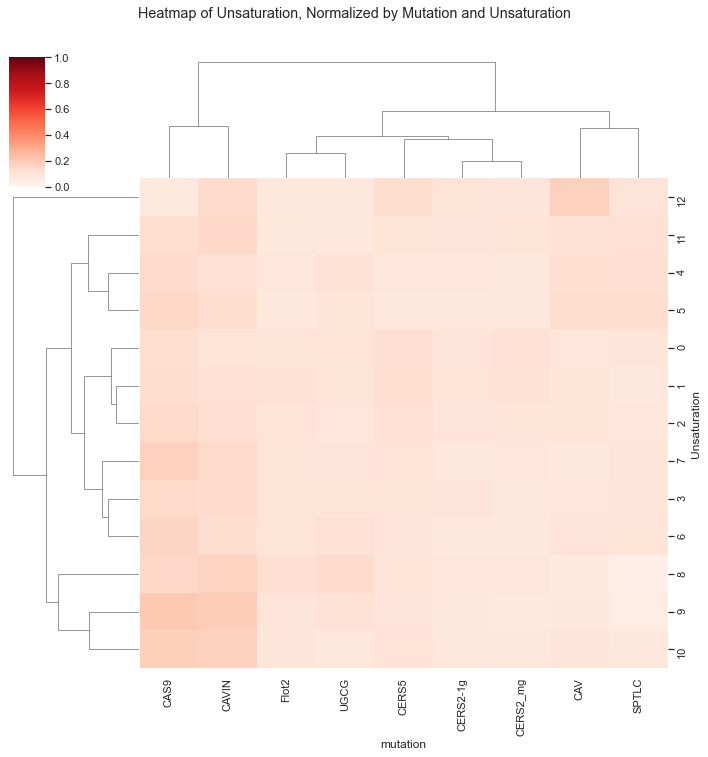

In [106]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Unsaturation',
                 drop_protein=['WT'],
                 title='Heatmap of Unsaturation, Normalized by Mutation and Unsaturation',
                )

# Heatmaps without row clustering

In [142]:
# import functions
import functions

### Acyl Chain Length

#### Acyl Chain Length, Evens

In [170]:
df_cl = functions.groupby_norm(df_meta2, df_p, var='Acyl Chain Length', drop_var=list(range(1,70,2)), drop_mutation=['WT'])

Text(0.5, 1.05, 'Heatmap of Chain Lengths, Normalized by Mutation and Chain Length')

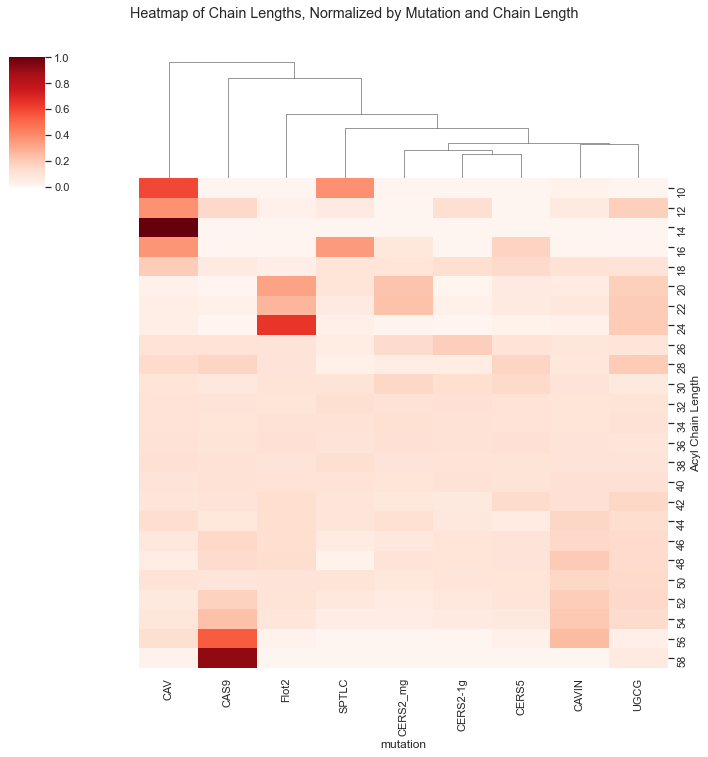

In [189]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_cl, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Chain Lengths, Normalized by Mutation and Chain Length', y=1.05)

#### Acyl Chain Length, Odds

In [238]:
df_cl_o = functions.groupby_norm(df_meta2, df_p, var='Acyl Chain Length', drop_var=list(range(0,70,2)), drop_mutation=['WT'])

Text(0.5, 1.05, 'Heatmap of Odd Chain Lengths, Normalized by Mutation and Chain Length')

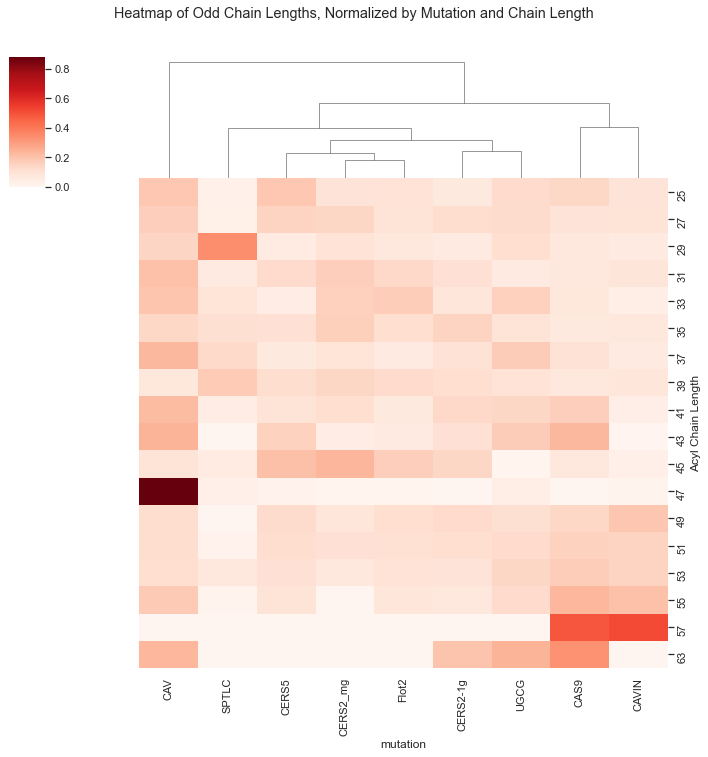

In [241]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_cl_o, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Odd Chain Lengths, Normalized by Mutation and Chain Length', y=1.05)

### Unsaturation

In [172]:
df_u = functions.groupby_norm(df_meta, df_p, var='Unsaturation', drop_mutation=['WT'])
df_u

mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
Unsaturation,,,,,,,,,
0,0.100506,0.098977,0.096582,0.115196,0.125795,0.119984,0.112318,0.113316,0.117325
1,0.105524,0.105239,0.105219,0.122246,0.123942,0.123297,0.118710,0.090299,0.105525
2,0.112324,0.107619,0.110158,0.113436,0.115347,0.118678,0.114767,0.108297,0.099375
3,0.114970,0.100783,0.125255,0.114463,0.095910,0.103767,0.114416,0.114157,0.116278
4,0.106845,0.140079,0.103327,0.101001,0.094037,0.087401,0.096015,0.148619,0.122675
5,0.120580,0.143869,0.118199,0.088204,0.090542,0.080347,0.092609,0.156595,0.109054
6,0.125210,0.112886,0.118024,0.091906,0.093944,0.100415,0.110867,0.117372,0.129377
7,0.140941,0.091319,0.130283,0.089432,0.097387,0.106393,0.114312,0.115017,0.114916
8,0.117315,0.079965,0.151040,0.103991,0.101260,0.108315,0.134142,0.046864,0.157107


Text(0.5, 1.05, 'Heatmap of Unsaturation, Normalized by Mutation and Unsaturation')

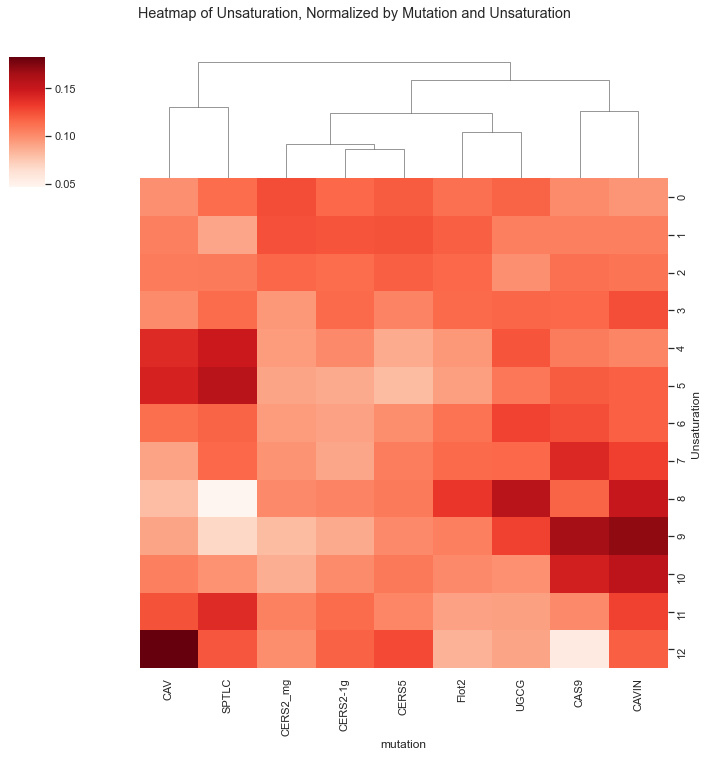

In [190]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_u, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Unsaturation, Normalized by Mutation and Unsaturation', y=1.05)

#### Unsaturation, grouped

In [169]:
# group unsaturation
import numpy as np
df_meta2['Unsaturation 2'] = np.where(df_meta2['Unsaturation'] < 3, df_meta2['Unsaturation'], '>=3')
df_meta2.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer,>=3
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer,2
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer,2
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer,0
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer,0


In [182]:
df_u2 = functions.groupby_norm(df_meta2, df_p, var='Unsaturation 2', drop_mutation=['WT'])
df_u2

mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
Unsaturation 2,,,,,,,,,
0,0.100506,0.098977,0.096582,0.115196,0.125795,0.119984,0.112318,0.113316,0.117325
1,0.105524,0.105239,0.105219,0.122246,0.123942,0.123297,0.118710,0.090299,0.105525
2,0.112324,0.107619,0.110158,0.113436,0.115347,0.118678,0.114767,0.108297,0.099375
>=3,0.119004,0.122343,0.121973,0.099736,0.093150,0.094212,0.102885,0.127586,0.119112


Text(0.5, 1.05, 'Heatmap of Unsaturation, Normalized by Mutations and Unsaturation')

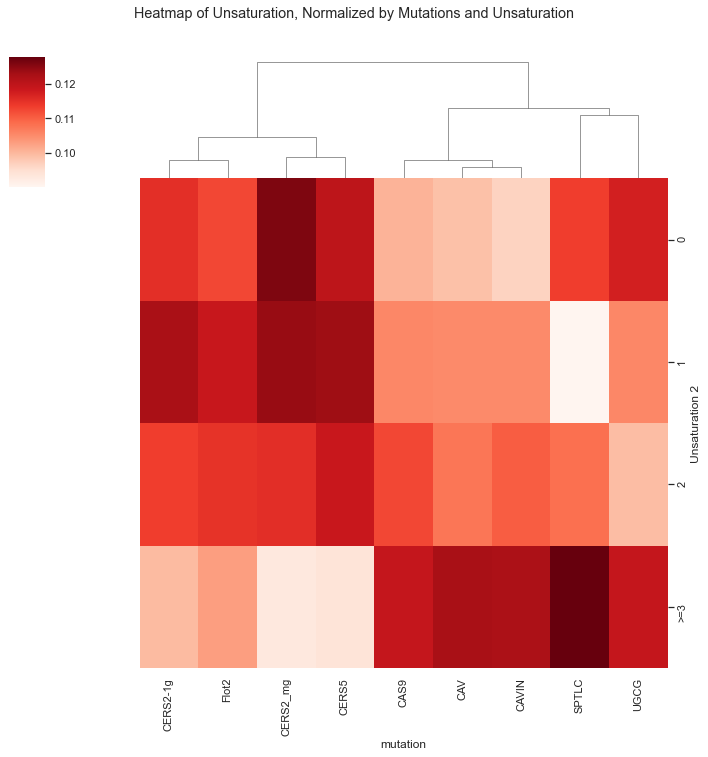

In [245]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_u2, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Unsaturation, Normalized by Mutations and Unsaturation', y=1.05)